In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import io
%cd "C:\Users\zaida\OneDrive\Desktop\3.Deep Learning"

C:\Users\zaida\OneDrive\Desktop\3.Deep Learning


In [3]:
df = pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")
# Sheet_name:-Name of my excel sheet

In [4]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## Problem Statement

#### Study & identify the reason why customers are churn or attrition (Leaving Company)
#### Based on study suggest stratigies to return customers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
# Cheacking NANs
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [8]:
# Spliting my data into numeric and objects

dfnum = df.select_dtypes(include=np.number) # np.number covers both int64 and float64
dfobj = df.select_dtypes(include=["object"]) 

In [9]:
# Identify categories variable within Numeric variables like 0&1 rating scales, score, etc

df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [10]:
# Taking Those variable who was categorical

dfcat = dfnum[["Churn",'CityTier','SatisfactionScore','Complain']]

In [11]:
# Droping these varibles from dfnum because i already take it in diffrent dataframe

dfnum = dfnum.drop(["Churn",'CityTier','SatisfactionScore','Complain'],axis=1)

In [12]:
for col in dfcat.columns:
    freq=dfcat[col].value_counts(dropna=False)
    print(freq)
# No missing values and no Duplicates Levels in gender 

Churn
0    4682
1     948
Name: count, dtype: int64
CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64
SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64
Complain
0    4026
1    1604
Name: count, dtype: int64


In [13]:
for col in dfobj.columns:
    freq=dfobj[col].value_counts(dropna=False)
    print(freq)

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
Gender
Male      3384
Female    2246
Name: count, dtype: int64
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


In [14]:
# Replacing Some names from the variables

In [15]:
dfobj.PreferredPaymentMode = dfobj.PreferredPaymentMode.str.replace("Cash on Delivery","COD")

In [16]:
dfobj.PreferredPaymentMode = dfobj.PreferredPaymentMode.str.replace("CC","Credit Card")

In [17]:
dfobj.PreferedOrderCat = dfobj.PreferedOrderCat.str.replace("Mobile Phone","Mobile")

In [18]:
dfnum.describe()
# Missing Values - Variable count less than dataframe row count
# Weather Mean & Median are close to one another . Mean gets distroted by outliers
# Median to be use if mean is distroted

,CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,8.557241,8.531475,0.721926,1.023999,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,2.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,16.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [19]:
# Median Imputation for Missing values
for i in dfnum.columns:
    dfnum[i] = dfnum[i].fillna(dfnum[i].median())

In [20]:
dfnum.describe()

,CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,10.134103,15.566785,2.934636,3.688988,4.214032,15.674600,1.716874,2.961812,4.459325,177.223030
std,1625.385339,8.357951,8.345961,0.705528,1.023999,2.583586,3.591058,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,3.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,15.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [21]:
# Combine all three dataframe into a single dataframe

In [22]:
ndf = pd.concat([dfnum,dfobj,dfcat],axis=1)

### Visualization

<Axes: ylabel='count'>

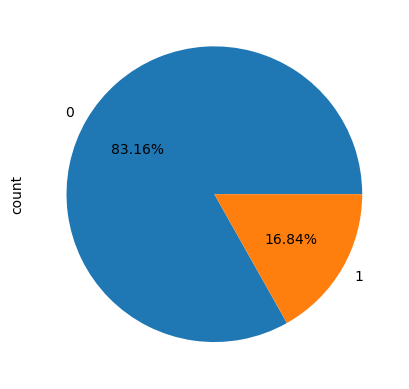

In [23]:
# Create pie Diagram with percentages of varible chrun
ndf.Churn.value_counts().plot(kind="pie",autopct="%.2F%%")
# 17% of Customers Leaving which is High

<Axes: ylabel='count'>

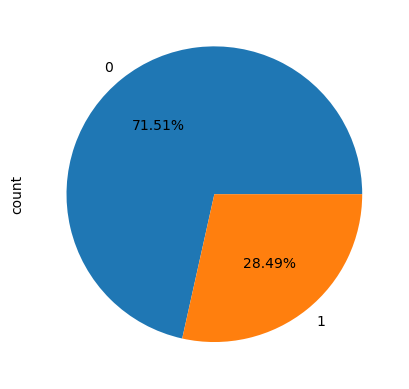

In [24]:
# Create pie Diagram with percentages of varible complain
ndf.Complain.value_counts().plot(kind="pie",autopct="%.2F%%")
# 28% Complains are there that are very high again

<Axes: ylabel='count'>

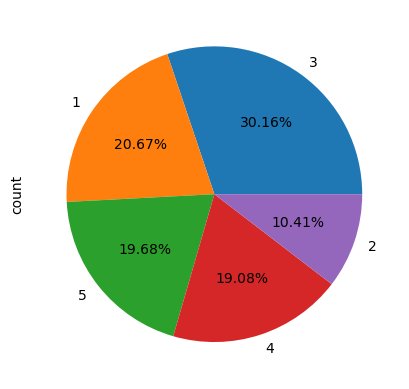

In [25]:
# Create pie Diagram with percentages of varible Satisfaction score
ndf.SatisfactionScore.value_counts().plot(kind="pie",autopct="%.2F%%")
# 31% of Customers have Satisfaction of 1 and 2 which is indicates of Dissatisfaction

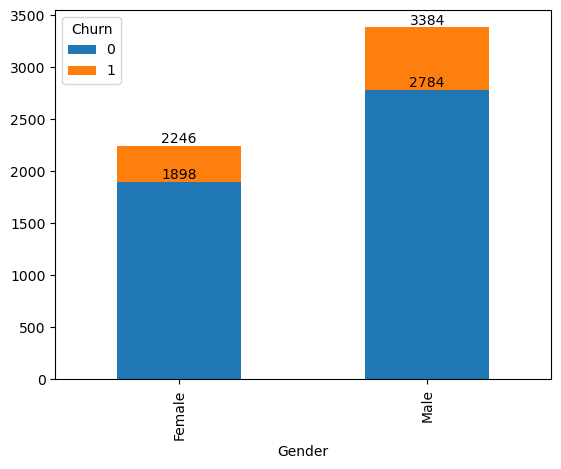

In [26]:
# What percentage of churn in Male or Female Customers
ax = pd.crosstab(ndf.Gender,ndf.Churn).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

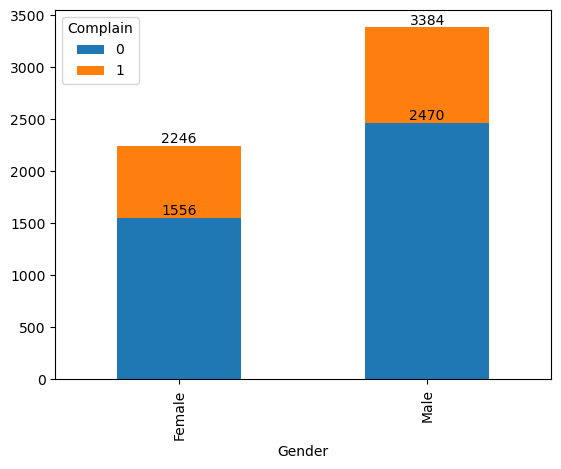

In [27]:
# What percentage of Complains in Male or Female Customers
ax = pd.crosstab(ndf.Gender,ndf.Complain).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

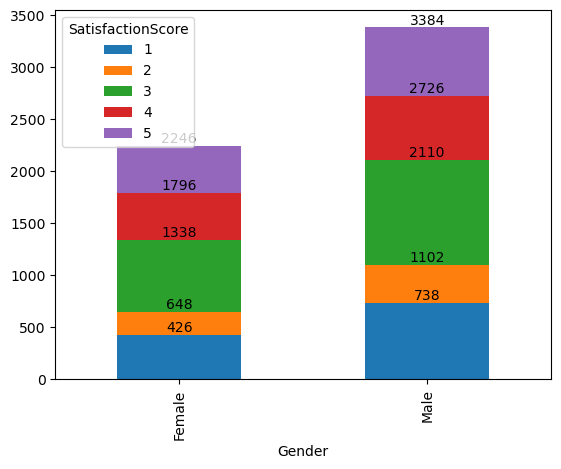

In [28]:
# What percentage of Satisfaction in Male or Female Customers
ax = pd.crosstab(ndf.Gender,ndf.SatisfactionScore).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

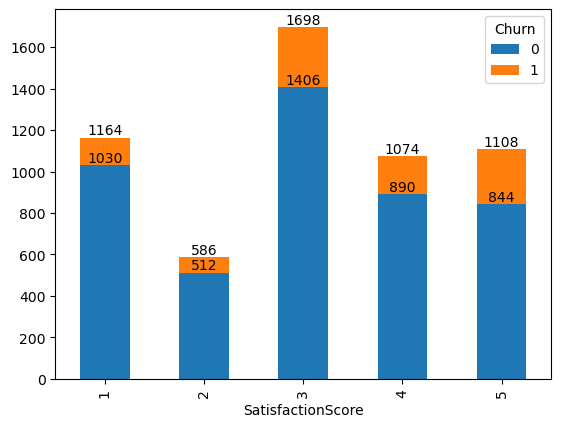

In [29]:
# What Percentage of SatisfactionScore and Churn Customers?
ax = pd.crosstab(ndf.SatisfactionScore,ndf.Churn).plot(kind="bar",stacked = True)
for i in ax.containers:
    ax.bar_label(i)

<Axes: >

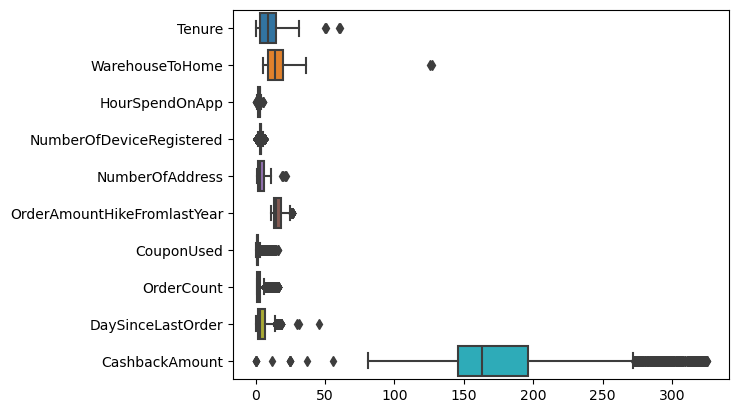

In [30]:
# Univariate plots for numeric variable- Boxplot of all Numeric variable except customer ID
sns.boxplot(dfnum.drop("CustomerID",axis=1),orient="h")

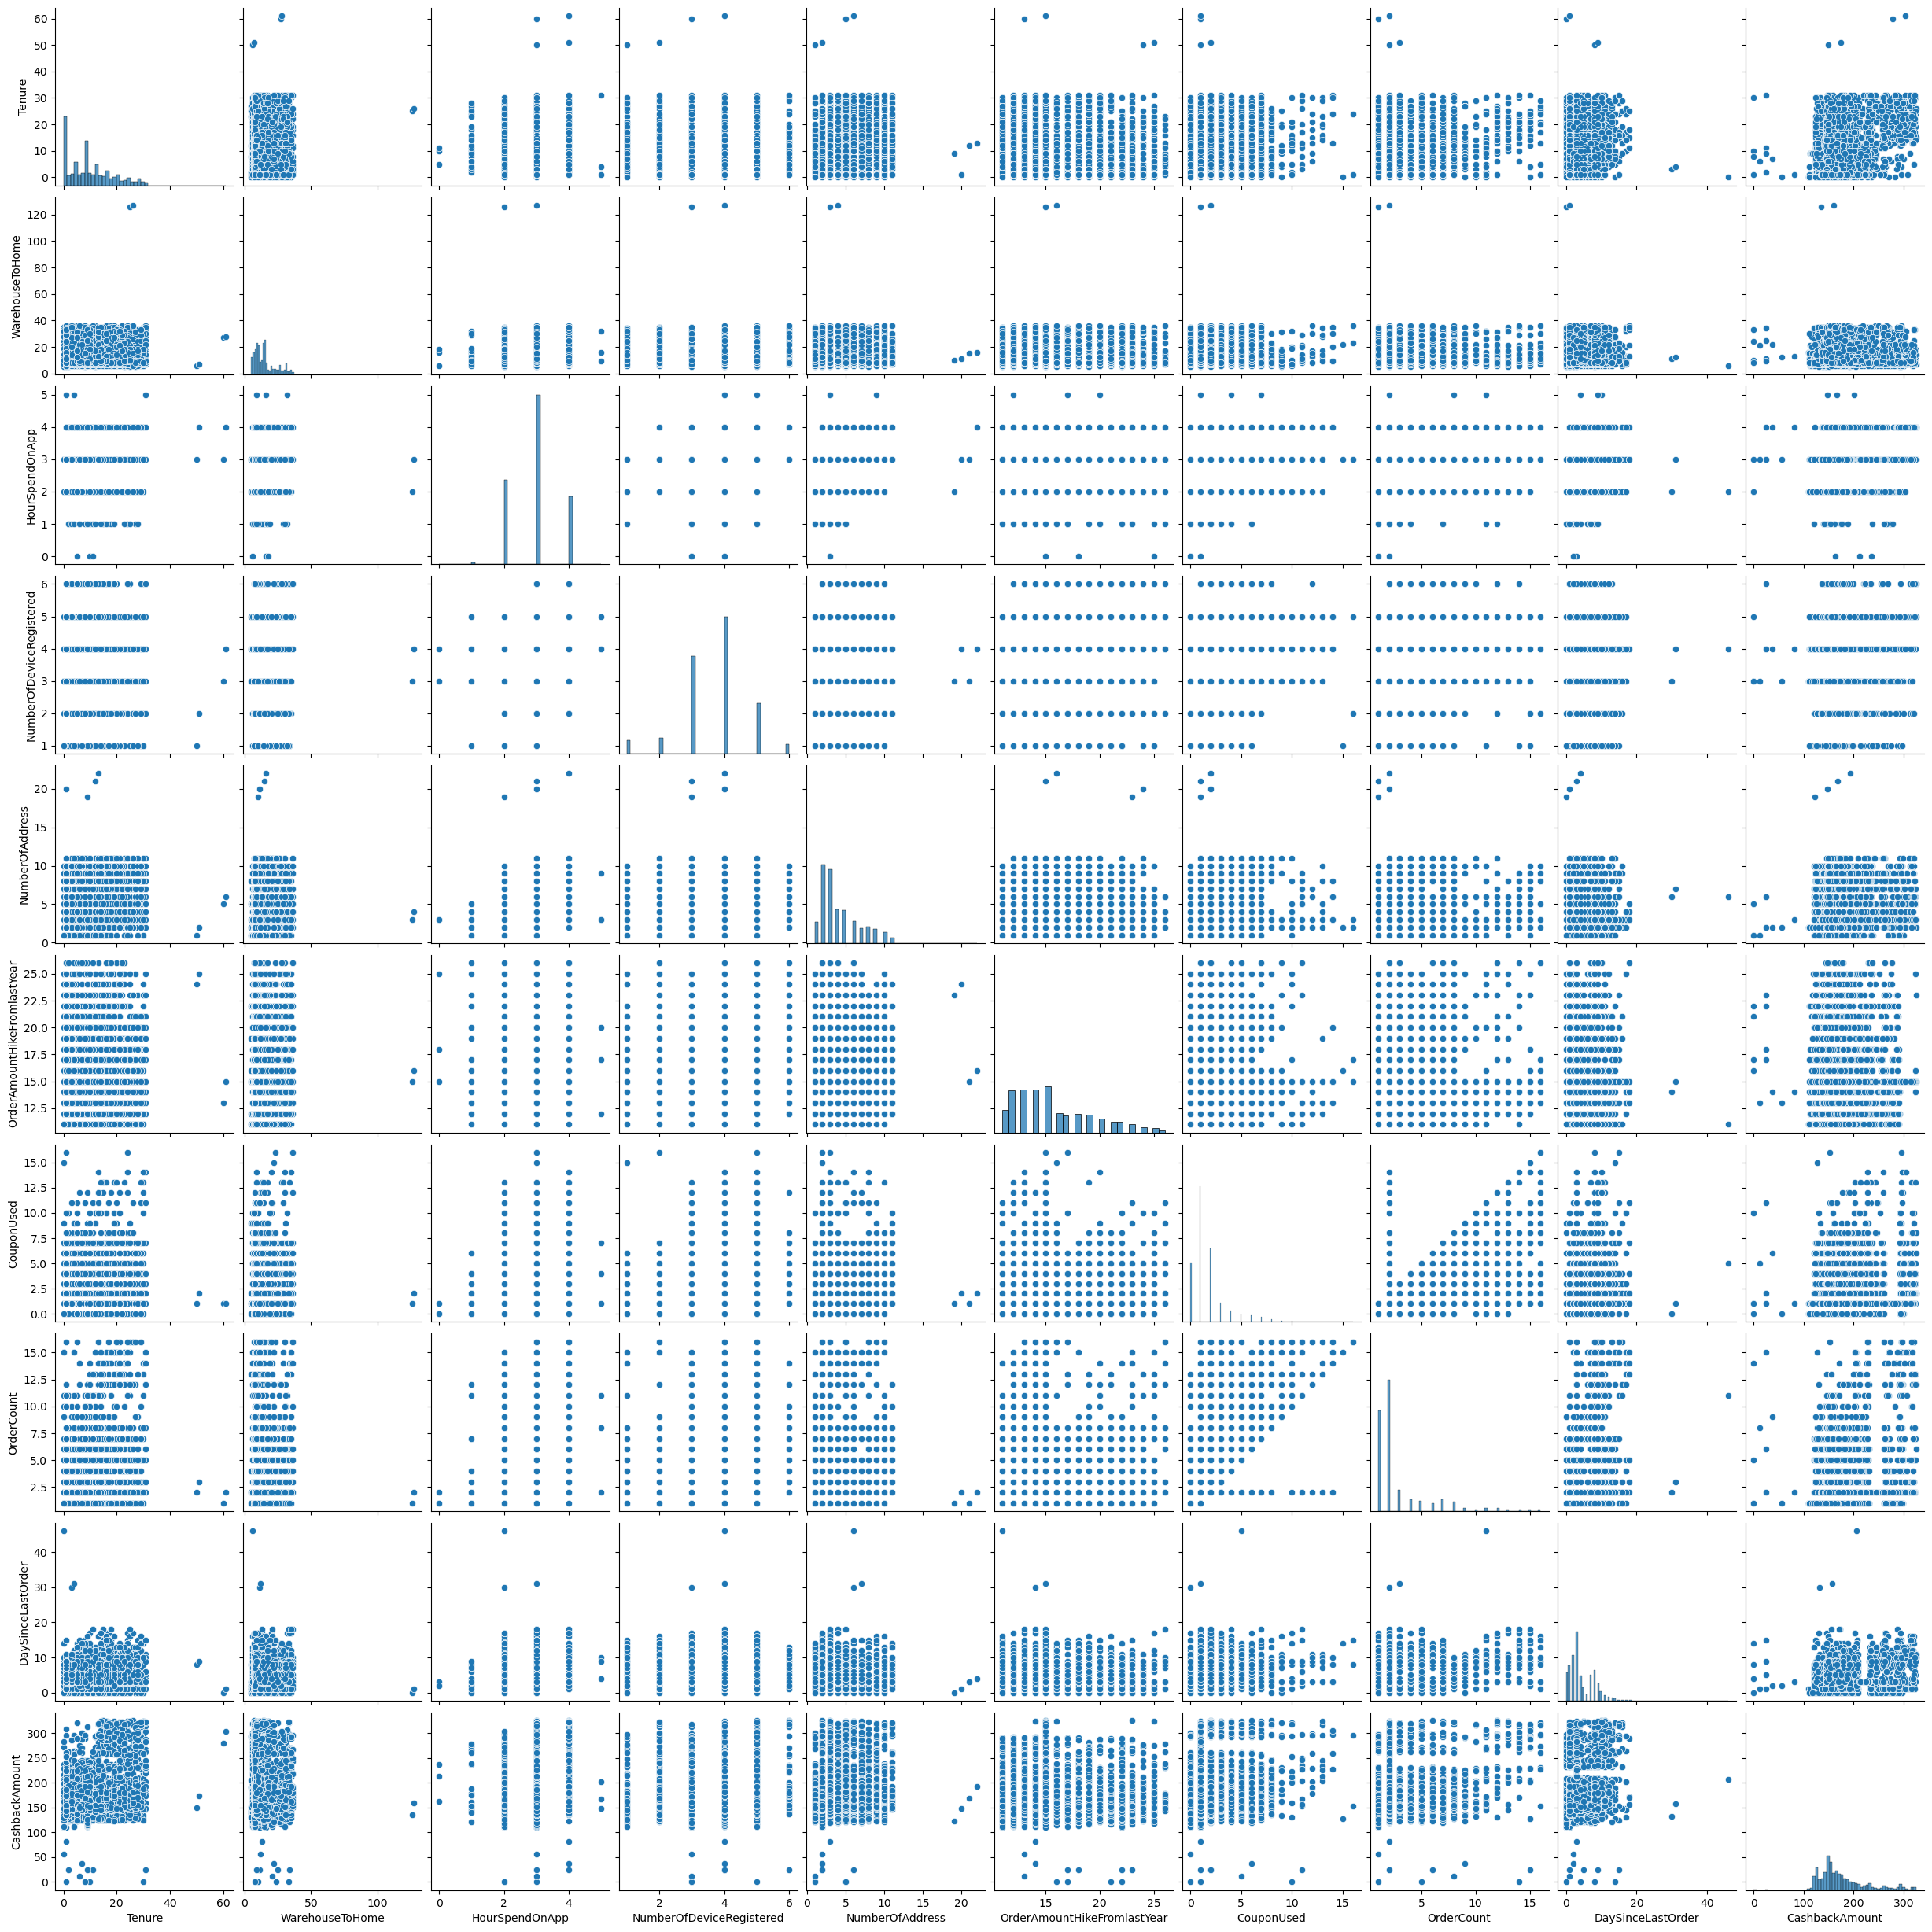

In [31]:
# sns.pairplot() Univariate (Histogram) and bivariate plot (scatter plot)
sns.pairplot(dfnum.drop("CustomerID",axis=1))

<Axes: >

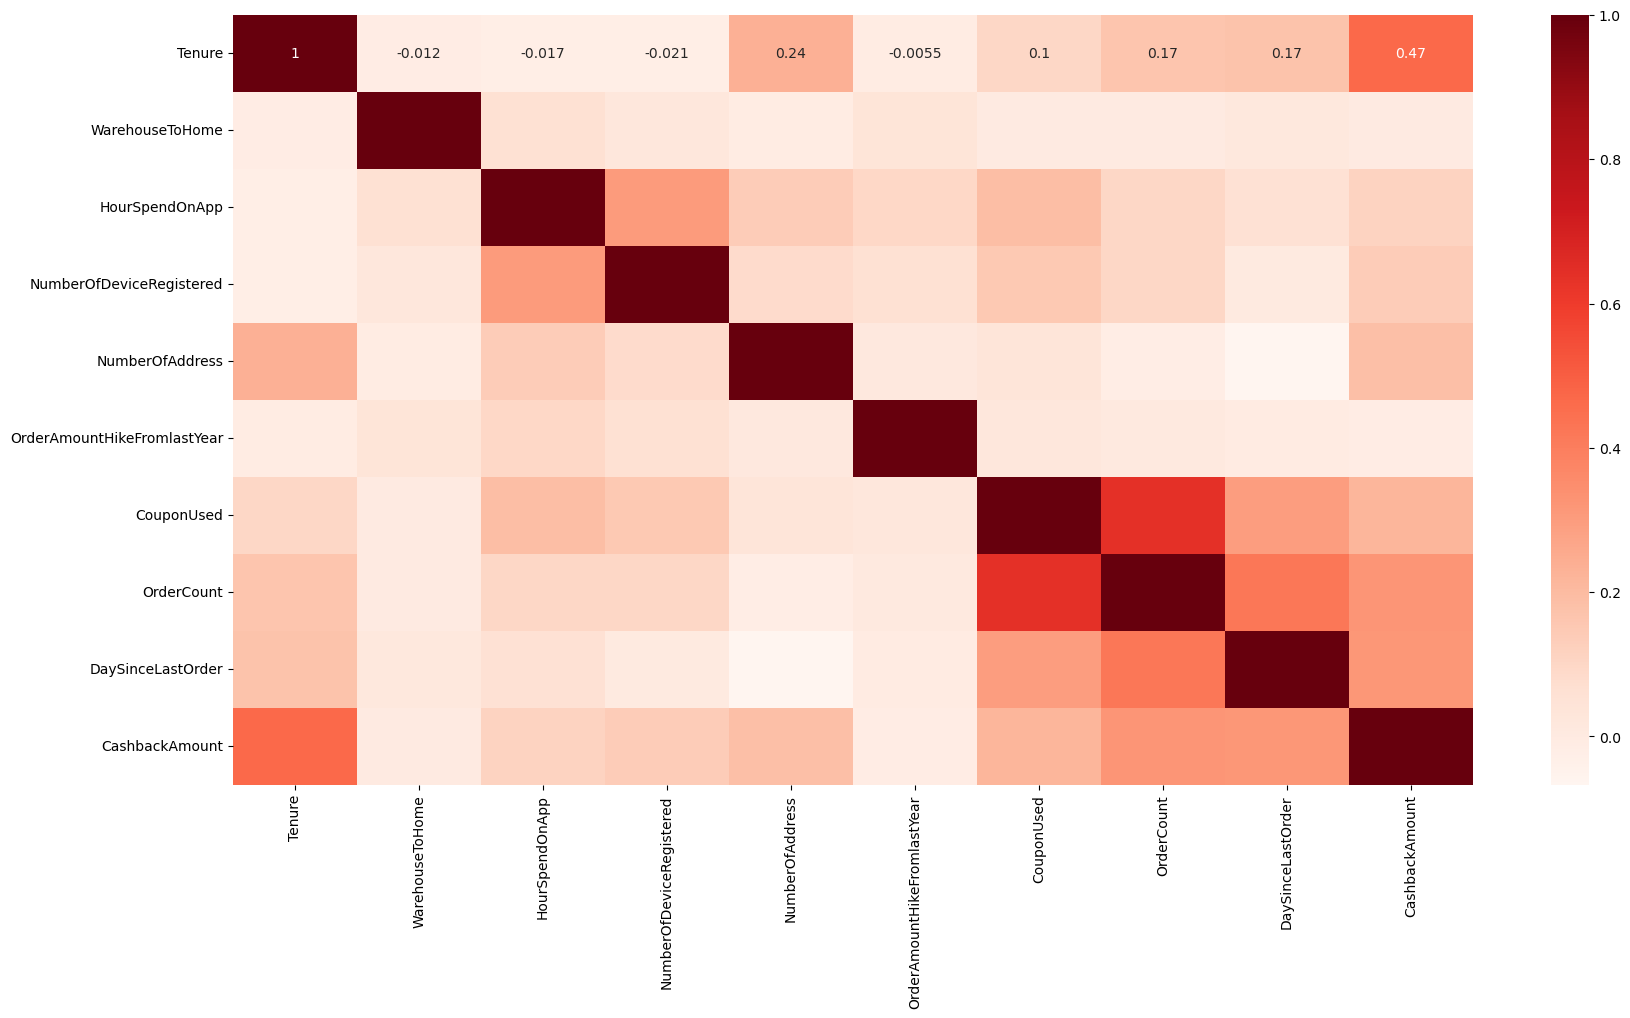

In [133]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(dfnum.drop("CustomerID",axis=1).corr(),cmap="Reds",annot=True)

# Hypothesis

In [33]:
ndf

,CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Churn,CityTier,SatisfactionScore,Complain
0,50001,4.0,6.0,3.0,3,9,11.0,1.0,1.0,5.0,159.93,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,1,3,2,1
1,50002,9.0,8.0,3.0,4,7,15.0,0.0,1.0,0.0,120.90,Phone,UPI,Male,Mobile,Single,1,1,3,1
2,50003,9.0,30.0,2.0,4,6,14.0,0.0,1.0,3.0,120.28,Phone,Debit Card,Male,Mobile,Single,1,1,3,1
3,50004,0.0,15.0,2.0,4,8,23.0,0.0,1.0,3.0,134.07,Phone,Debit Card,Male,Laptop & Accessory,Single,1,3,5,0
4,50005,0.0,12.0,3.0,3,3,11.0,1.0,1.0,3.0,129.60,Phone,Credit Card,Male,Mobile,Single,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,10.0,30.0,3.0,2,6,18.0,1.0,2.0,4.0,150.71,Computer,Credit Card,Male,Laptop & Accessory,Married,0,1,1,0
5626,55627,13.0,13.0,3.0,5,6,16.0,1.0,2.0,3.0,224.91,Mobile Phone,Credit Card,Male,Fashion,Married,0,1,5,0
5627,55628,1.0,11.0,3.0,2,3,21.0,1.0,2.0,4.0,186.42,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married,0,1,4,1
5628,55629,23.0,9.0,4.0,5,4,15.0,2.0,2.0,9.0,178.90,Computer,Credit Card,Male,Laptop & Accessory,Married,0,3,4,0


In [34]:
# Data Aggregation and hypothesis testing
# Test Null Average Cashback Amount for churn 0/1 equal
# Steps:-
# 1) Groupby()-mean,var 2) Null & Alt hypothesis Formed 3) Split data 4) Conduct test & interpret 

#### Null : There is no significant diffrence in average cashback amount of churn 0/1.
#### Alt : There is significant diffrence in average cashback amount of churn 0/1.

In [35]:
ndf.CashbackAmount.groupby(ndf.Churn).mean()

Churn
0    180.635203
1    160.370928
Name: CashbackAmount, dtype: float64

In [36]:
ndf.CashbackAmount.groupby(ndf.Churn).var()

Churn
0    2543.668119
1    1477.330322
Name: CashbackAmount, dtype: float64

In [37]:
# Split data
Churnno = ndf[ndf.Churn==0]
Churnyes = ndf[ndf.Churn==1]

In [38]:
from scipy.stats import ttest_ind

In [39]:
ttest_ind(Churnno.CashbackAmount,Churnyes.CashbackAmount)
# Since pvalue=2.867709304816521e-31 is less than 0.05 we will reject null
# Diffrence in means is statistically significance
# Cashback amount is important predictors for prediccting churn

TtestResult(statistic=11.701754038593704, pvalue=2.867709304816521e-31, df=5628.0)

#### Null : There is no significant diffrence in average Tenure amount of churn 0/1.
#### Alt : There is significant diffrence in average Tenure amount of churn 0/1.

In [40]:
ndf.Tenure.groupby(ndf.Churn).var()

Churn
0    68.347324
1    29.994024
Name: Tenure, dtype: float64

In [41]:
# Test Null Average figure of churn 0/1 equal
ttest_ind(Churnno.Tenure,Churnyes.Tenure)
# Since pvalue=2.494913539747146e-150 is less than 0.05 we will reject null

TtestResult(statistic=26.927204328509323, pvalue=2.494913539747146e-150, df=5628.0)

#### test null Average cashback Amount of diffrent Preferable payment modes

In [42]:
ndf.CashbackAmount.groupby(ndf.PreferredPaymentMode).mean()

PreferredPaymentMode
COD            169.871323
Credit Card    177.246110
Debit Card     177.058427
E wallet       185.829414
UPI            174.407585
Name: CashbackAmount, dtype: float64

In [43]:
# Split data:
cod = ndf[ndf.PreferredPaymentMode == "COD"]
CC = ndf[ndf.PreferredPaymentMode == "Credit Card"]
Debit = ndf[ndf.PreferredPaymentMode == "Debit Card"]
ewall = ndf[ndf.PreferredPaymentMode == "E wallet"]
upi = ndf[ndf.PreferredPaymentMode == "UPI"]

In [44]:
# So more than two classes/groups so Anova
from scipy.stats import f_oneway

In [45]:
f_oneway(cod.CashbackAmount,CC.CashbackAmount,Debit.CashbackAmount,ewall.CashbackAmount,upi.CashbackAmount)
# Since pvalue=1.708830425060344e-24 is less than 0.05 - Reject null

F_onewayResult(statistic=7.948402264464854, pvalue=2.193034255477045e-06)

#### Test null - No association between Churn and Complain 

In [46]:
ndf.Churn.groupby(ndf.Complain).mean()

Complain
0    0.109290
1    0.316708
Name: Churn, dtype: float64

In [47]:
com0 = ndf[ndf.Complain==0]
com1 = ndf[ndf.Complain==1]

In [48]:
com1.head()

,CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Churn,CityTier,SatisfactionScore,Complain
0,50001,4.0,6.0,3.0,3,9,11.0,1.0,1.0,5.0,159.93,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,1,3,2,1
1,50002,9.0,8.0,3.0,4,7,15.0,0.0,1.0,0.0,120.90,Phone,UPI,Male,Mobile,Single,1,1,3,1
2,50003,9.0,30.0,2.0,4,6,14.0,0.0,1.0,3.0,120.28,Phone,Debit Card,Male,Mobile,Single,1,1,3,1
5,50006,0.0,22.0,3.0,5,2,22.0,4.0,6.0,7.0,139.19,Computer,Debit Card,Female,Mobile,Single,1,1,5,1
7,50008,9.0,6.0,3.0,3,3,16.0,2.0,2.0,0.0,122.93,Phone,Credit Card,Male,Mobile,Divorced,1,1,2,1


In [49]:
from scipy.stats import chi2_contingency

In [50]:
# Test Null Average figure of churn 0/1 equal
chi2_contingency(pd.crosstab(ndf.Churn,ndf.Complain))
# Since pvalue=2.6644609654641377e-78 is less than 0.05 we will reject null

Chi2ContingencyResult(statistic=350.92545525927073, pvalue=2.6644609654641377e-78, dof=1, expected_freq=array([[3348.08738899, 1333.91261101],
       [ 677.91261101,  270.08738899]]))

#### Test Null No association between Churn and Satisfaction score

In [51]:
chi2_contingency(pd.crosstab(ndf.Churn,ndf.SatisfactionScore))
# Since pvalue=2.4233349782737515e-14 is less than 0.05 we will reject null

Chi2ContingencyResult(statistic=69.8653884066938, pvalue=2.4233349782737515e-14, dof=4, expected_freq=array([[ 968.00142096,  487.32717584, 1412.08454707,  893.15595027,
         921.43090586],
       [ 195.99857904,   98.67282416,  285.91545293,  180.84404973,
         186.56909414]]))

In [52]:
ndf.columns

Index(['CustomerID', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice',
       'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus',
       'Churn', 'CityTier', 'SatisfactionScore', 'Complain'],
      dtype='object')

## Encoding

In [53]:
# Dummy Encode Non Numeric and categorical variables 
df = pd.get_dummies(ndf,columns=['PreferredLoginDevice','PreferredPaymentMode','Gender', 'PreferedOrderCat', 'MaritalStatus','CityTier', 'SatisfactionScore', 'Complain'])

### Splitting Data

In [54]:
# Split Data into X(independent Variables) & y (Dependent Variabel)

In [55]:
df

,CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,CityTier_1,CityTier_2,CityTier_3,SatisfactionScore_1,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,Complain_0,Complain_1
0,50001,4.0,6.0,3.0,3,9,11.0,1.0,1.0,5.0,...,False,False,True,False,True,False,False,False,False,True
1,50002,9.0,8.0,3.0,4,7,15.0,0.0,1.0,0.0,...,True,False,False,False,False,True,False,False,False,True
2,50003,9.0,30.0,2.0,4,6,14.0,0.0,1.0,3.0,...,True,False,False,False,False,True,False,False,False,True
3,50004,0.0,15.0,2.0,4,8,23.0,0.0,1.0,3.0,...,False,False,True,False,False,False,False,True,True,False
4,50005,0.0,12.0,3.0,3,3,11.0,1.0,1.0,3.0,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,10.0,30.0,3.0,2,6,18.0,1.0,2.0,4.0,...,True,False,False,True,False,False,False,False,True,False
5626,55627,13.0,13.0,3.0,5,6,16.0,1.0,2.0,3.0,...,True,False,False,False,False,False,False,True,True,False
5627,55628,1.0,11.0,3.0,2,3,21.0,1.0,2.0,4.0,...,True,False,False,False,False,False,True,False,False,True
5628,55629,23.0,9.0,4.0,5,4,15.0,2.0,2.0,9.0,...,False,False,True,False,False,False,True,False,True,False


In [80]:
X = df.drop(["Churn","CustomerID"],axis=1)

In [57]:
y = df.Churn

In [81]:
X.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,...,CityTier_1,CityTier_2,CityTier_3,SatisfactionScore_1,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,Complain_0,Complain_1
0,4.00,6.00,3.00,3,9,11.00,1.00,1.00,5.00,159.93,...,False,False,True,False,True,False,False,False,False,True
1,9.00,8.00,3.00,4,7,15.00,0.00,1.00,0.00,120.90,...,True,False,False,False,False,True,False,False,False,True
2,9.00,30.00,2.00,4,6,14.00,0.00,1.00,3.00,120.28,...,True,False,False,False,False,True,False,False,False,True
3,0.00,15.00,2.00,4,8,23.00,0.00,1.00,3.00,134.07,...,False,False,True,False,False,False,False,True,True,False
4,0.00,12.00,3.00,3,3,11.00,1.00,1.00,3.00,129.60,...,True,False,False,False,False,False,False,True,True,False


In [78]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20)

## Model Building

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
LR =LogisticRegression()

In [63]:
LR.fit(Xtrain,ytrain)

LogisticRegression()

In [64]:
LR.score(Xtest,ytest)

0.8534635879218473

In [91]:
LR_pred = LR.predict(Xtest)

In [92]:
pd.crosstab(ytest,LR_pred)# Confusion Matrix - 0 - Positive & 1 - Negative
# TP - 903, FN - 13 , FP - 152 , TN - 58

col_0,0,1
Churn,,
0,903,13
1,152,58


In [94]:
from sklearn.metrics import RocCurveDisplay,classification_report

In [96]:
print(classification_report(ytest,LR_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       916
           1       0.82      0.28      0.41       210

    accuracy                           0.85      1126
   macro avg       0.84      0.63      0.66      1126
weighted avg       0.85      0.85      0.82      1126



### Imbalencing

In [110]:
LR2 = LogisticRegression(class_weight="balanced")

In [111]:
LR2.fit(Xtrain,ytrain)

LogisticRegression(class_weight='balanced')

In [112]:
LR2.score(Xtest,ytest)

0.7255772646536413

### Oversampling

In [97]:
from imblearn.over_sampling import SMOTENC
# SMOTE - Only is all Independent Variables are Numeric
# SMOTEN - Only is all Independent Variables are Catregorical
# SMOTENC - When Independent Variables are both Numeric and Non Numeric Categorical

In [98]:
smote = SMOTENC(categorical_features=['PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'CityTier_1',
       'CityTier_2', 'CityTier_3', 'SatisfactionScore_1',
       'SatisfactionScore_2', 'SatisfactionScore_3', 'SatisfactionScore_4',
       'SatisfactionScore_5', 'Complain_0', 'Complain_1'])

In [99]:
Xsmote,ysmote = smote.fit_resample(X,y)

In [100]:
print(pd.DataFrame((y).value_counts()))
print(pd.DataFrame(ysmote).value_counts())

       count
Churn       
0       4682
1        948
Churn
0        4682
1        4682
Name: count, dtype: int64


In [102]:
L = LogisticRegression().fit(Xsmote,ysmote)

In [103]:
L

LogisticRegression()

In [104]:
L.score(Xsmote,ysmote)

0.8240068346860316

In [114]:
lsmotepred = L.predict(Xsmote)

In [115]:
print(classification_report(ysmote,lsmotepred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4682
           1       0.82      0.83      0.83      4682

    accuracy                           0.82      9364
   macro avg       0.82      0.82      0.82      9364
weighted avg       0.82      0.82      0.82      9364



In [116]:
from sklearn.metrics import RocCurveDisplay,auc

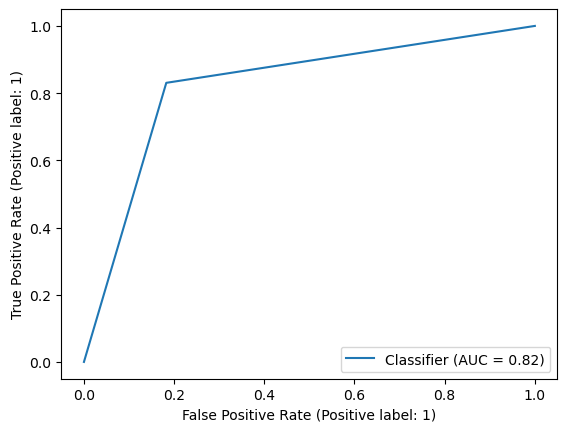

In [118]:
RocCurveDisplay.from_predictions(ysmote,lsmotepred)

### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
DT = DecisionTreeClassifier(max_depth=12).fit(Xtrain,ytrain)

In [69]:
DT

DecisionTreeClassifier(max_depth=12)

In [70]:
DT.score(Xtest,ytest)

0.9307282415630551

In [71]:
# Trainig score
DT.score(Xtrain,ytrain)

0.9837921847246892

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
cross_val_score(DT,Xtrain,ytrain)

array([0.92785794, 0.91342952, 0.92563818, 0.92008879, 0.92777778])

In [74]:
cross_val_score(DT,Xtrain,ytrain).mean()

0.9182962140831175

In [123]:
tree_pred = DT.predict(Xtest)

In [124]:
print(classification_report(tree_pred,ytest))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       922
           1       0.80      0.82      0.81       204

    accuracy                           0.93      1126
   macro avg       0.88      0.89      0.88      1126
weighted avg       0.93      0.93      0.93      1126



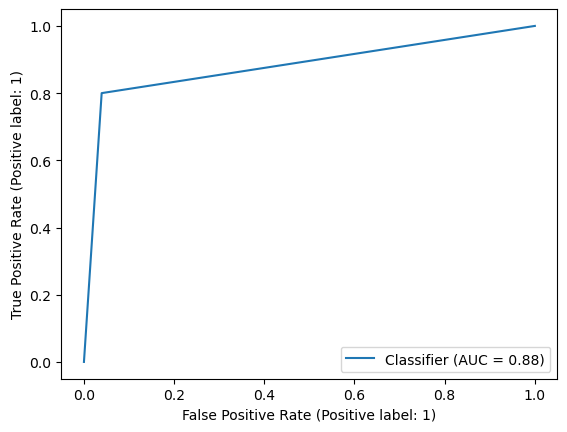

In [125]:
RocCurveDisplay.from_predictions(ytest,tree_pred)

### Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(Xsmote,ysmote)

In [127]:
RF.score(Xsmote,ysmote)

1.0

In [128]:
cross_val_score(RF,Xsmote,ysmote)

array([0.82327816, 0.97971169, 0.99145755, 0.98878804, 0.99145299])

In [129]:
cross_val_score(RF,Xsmote,ysmote).mean()

0.9584614471960975

In [130]:
RF_pred = RF.predict(Xsmote)

In [131]:
print(classification_report(RF_pred,ysmote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4682
           1       1.00      1.00      1.00      4682

    accuracy                           1.00      9364
   macro avg       1.00      1.00      1.00      9364
weighted avg       1.00      1.00      1.00      9364



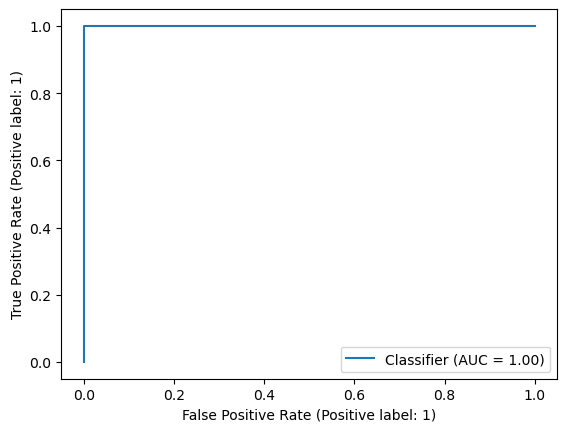

In [132]:
RocCurveDisplay.from_predictions(RF_pred,ysmote)

### Auto ML

In [76]:
from lazypredict.Supervised import LazyClassifier

In [135]:
# Auto ML
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(Xtrain,Xtest,ytrain,ytest)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.35it/s]

[LightGBM] [Info] Number of positive: 738, number of negative: 3766
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 4504, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163854 -> initscore=-1.629825
[LightGBM] [Info] Start training from score -1.629825
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.95               0.88     0.88      0.95   
XGBClassifier                      0.92               0.84     0.84      0.92   
DecisionTreeClassifier             0.90               0.84     0.84      0.90   
RandomForestClassifier             0.92               0.83     0.83      0.92   
BaggingClassifier        